In [75]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [76]:
#Set up the grid
nx = 41
ny = 41
nt = 700
nit = 50
c = 1
dx = 2/(nx-1)
dy = 2/(nx-1)
x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)
X,Y = np.meshgrid(x,y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny,nx))
v = np.zeros((ny,nx))
p = np.zeros((ny,nx))
b = np.zeros((ny,nx))

In [77]:
#Set b
def build_up_b(b,rho,dt,u,v,dx,dy):
    b[1:-1,1:-1] = rho*(
                        (1/dt)*(((u[1:-1,2:]-u[1:-1,0:-2])/2/dx)
                                +((v[2:,1:-1]-v[0:-2,1:-1])/2/dy))
                                -((u[1:-1,2:]-u[1:-1,0:-2])/2/dx)**2
                                -(2*((u[2:,1:-1]-u[0:-2,1:-1])/2/dy)*((v[1:-1,2:]-v[1:-1,0:-2])/2/dx))
                                -((v[2:,1:-1]-v[0:-2,1:-1])/2/dy)**2
                        )
    return b

def pressure_poisson(p,dx,dy,b):
    pn = np.empty_like(p)
    pn = p.copy()

    for q in range(nit):
        pn = p.copy()
        p[1:-1,1:-1]=((pn[1:-1,2:]+pn[1:-1,0:-2])*dy**2\
                      +(pn[2:,1:-1]+pn[0:-2,1:-1])*dx**2)\
                      /(2*(dx**2+dy**2))\
                      -rho*dx**2*dy**2/(2*(dx**2+dy**2))\
                      *b[1:-1,1:-1]
        p[-1,:]=0 #p=0@y=2
        p[0,:]=p[1,:] #dp/dy=0@y=0
        p[:,0]=p[:,1] #dp/dx=0@x=0
        p[:,-1]=p[:,-2] #dp/dx=0@x=2

    return p

In [78]:
def cavity_flow(nt,u,v,dt,dx,dy,p,rho,nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny,nx))

    for n in range(nt):
        un = u.copy()
        vn = v.copy()

        b = build_up_b(b,rho,dt,u,v,dx,dy)
        p = pressure_poisson(p,dx,dy,b)

        u[1:-1,1:-1] = un[1:-1,1:-1]\
                       -un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2])\
                       -vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1])\
                       -dt/(rho*2*dx)*(p[1:-1,2:]-p[1:-1,0:-2])\
                       +nu*(
                           (dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]))\
                           +(dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]))
                           )
        v[1:-1,1:-1] = vn[1:-1,1:-1]\
                       -un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,0:-2])\
                       -vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[0:-2,1:-1])\
                       -dt/(rho*2*dy)*(p[2:,1:-1]-p[0:-2,1:-1])\
                       +nu*(
                           (dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2]))\
                           +(dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1]))
                           )

        u[0,:]=0
        u[:,0]=0
        u[:,-1]=0
        u[-1,:]=1
        v[0,:]=0
        v[:,0]=0
        v[-1,:]=0
        v[:,-1]=0

    return u,v,p

In [79]:
u,v,p=cavity_flow(nt,u,v,dt,dx,dy,p,rho,nu)

Text(0, 0.5, 'Y')

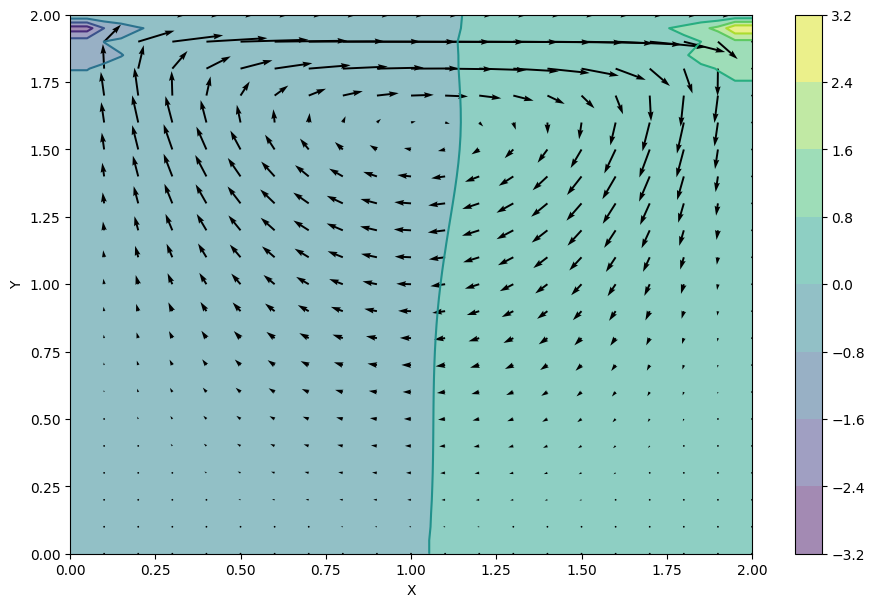

In [80]:
fig = plt.figure(figsize=(11,7),dpi=100)
#Plot the pressure field as a contour
plt.contourf(X,Y,p,alpha=0.5,cmap=cm.viridis)
plt.colorbar()
#Plot the pressure field outlines
plt.contour(X,Y,p,cmap=cm.viridis)
#Plot the velocity field
plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2])
plt.xlabel('X')
plt.ylabel('Y')

(0.0, 2.0)

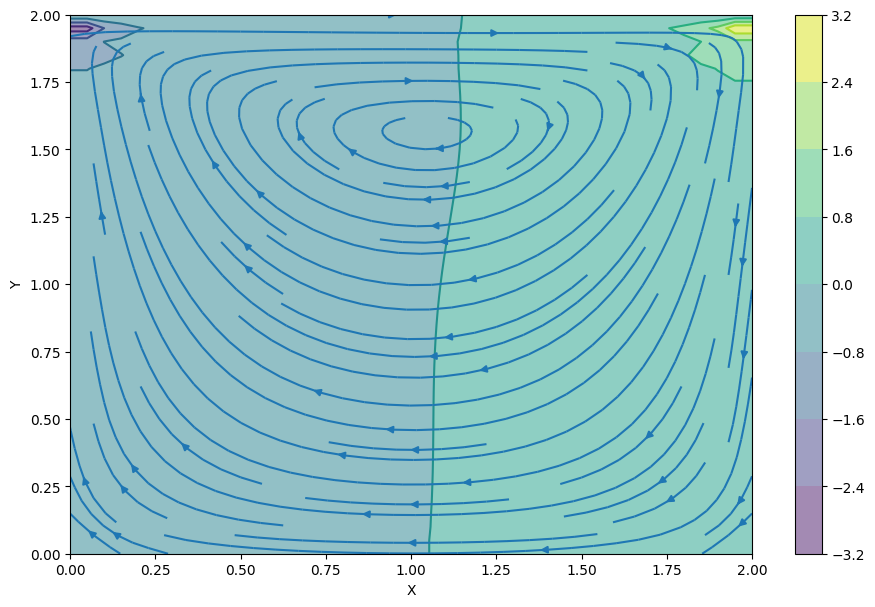

In [81]:
fig=plt.figure(figsize=(11,7),dpi=100)
plt.contourf(X,Y,p,alpha=0.5,cmap=cm.viridis)
plt.colorbar()
plt.contour(X,Y,p,cmap=cm.viridis)
plt.streamplot(X,Y,u,v)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,2)
plt.ylim(0,2)